# Importation des librairies

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, roc_auc_score, auc, accuracy_score,precision_score

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt   
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn import metrics
from sklearn.metrics import confusion_matrix

from DS2Pipe.Prepro import Prepro as Pp

In [8]:
data = pd.read_csv('ger_data.csv')
target = data.iloc[:,-1] 
data = data.drop(columns="Actual_Score")

In [9]:
Pipe = Pp(data,target)

In [10]:
Pipe.data.head().T

,0,1,2,3,4
Status_Account,A11,A12,A14,A11,A11
Duration,6,48,12,42,24
Credit_History,A34,A32,A34,A32,A33
Purpose,A43,A43,A46,A42,A40
Credit_Amount,1169,5951,2096,7882,4870
Saving_Account,A65,A61,A61,A61,A61
Present,A75,A73,A74,A74,A73
Installment,4,2,2,2,3
Personal_Status,A93,A92,A93,A93,A93
Other,A101,A101,A101,A103,A101


In [15]:
Pipe.data_split([1,4,12],[7,10,15,17])

data_join = Pipe.data_join(Pipe.scaler(Pipe.num),Pipe.onehot(Pipe.quali))

data_join = Pipe.data_join(data_join,Pipe.scaler(Pipe.numdisc))

In [16]:
X = data_join
Y = target -1

# Building our first models

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [18]:
#Building ROC curve 
def roccurve(y_values, y_preds_proba):
    fpr, tpr, _ = metrics.roc_curve(y_values, y_preds_proba)
    xx = np.arange(101) / float(100)
    aur = metrics.auc(fpr,tpr)

    plt.xlim(0, 1.0)
    plt.ylim(0, 1.25)
    plt.plot([0.0, 0.0], [0.0, 1.0], color='green', linewidth=8)
    plt.plot([0.0, 1.0], [1.0, 1.0], color='green', label='Perfect Model', linewidth=4)
    plt.plot(xx,xx, color='blue', label='Random Model')
    plt.plot(fpr,tpr, color='red', label='User Model')
    plt.title("ROC Curve - AUR value ="+str(aur))
    plt.xlabel('% false positives')
    plt.ylabel('% true positives')
    plt.legend()
    plt.show()

### RandomForestClassifier

In [19]:
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

y_pred_prob = classifier.predict_proba(X_test)[:,1]
y_pred = classifier.predict(X_test)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


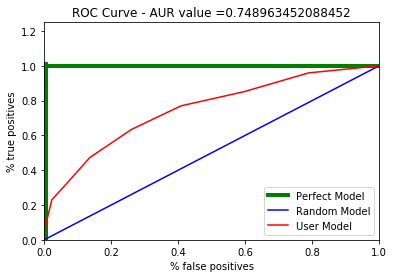

In [20]:
roccurve(y_values=y_test, y_preds_proba=y_pred_prob)

In [21]:
pd.crosstab(y_test,y_pred)

col_0,0,1
Actual_Score,,
0,163,13
1,49,25


In [22]:
print(classification_report(y_test,y_pred))  

              precision    recall  f1-score   support

           0       0.77      0.93      0.84       176
           1       0.66      0.34      0.45        74

    accuracy                           0.75       250
   macro avg       0.71      0.63      0.64       250
weighted avg       0.74      0.75      0.72       250



# LightGBM

In [23]:
import lightgbm as lgb

model = lgb.LGBMClassifier().fit(X_train, y_train)

y_pred_lightgbm_prob = model.predict_proba(X_test)[:,1]
y_pred_lightgbm=model.predict(X_test)

roccurve (y_test,y_pred_lightgbm_prob)

ModuleNotFoundError: No module named 'lightgbm'

In [16]:
print(classification_report(y_test,y_pred_lightgbm))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       176
           1       0.63      0.50      0.56        74

    accuracy                           0.76       250
   macro avg       0.72      0.69      0.70       250
weighted avg       0.75      0.76      0.76       250



# Logistic Regression

C:\Users\Brahim\Anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


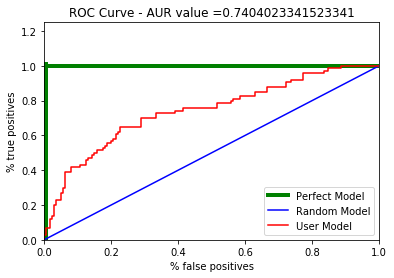

In [17]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(X_train, y_train)

y_pred_logistic_regression_prob = model.predict_proba(X_test)[:,1]
y_pred_logistic_regression = model.predict(X_test)

roccurve(y_test,y_pred_logistic_regression_prob)

In [ ]:
print(classification_report(y_test, y_pred_dtc))

## Decision Tree Classifier

In [18]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc_model = DecisionTreeClassifier().fit(X_train, y_train)

y_pred_dtc = dtc_model.predict(X_test)
y_pred_dtc_prob = dtc_model.predict_proba(X_test)

In [19]:
print(classification_report(y_test, y_pred_dtc))
pd.crosstab(y_test, y_pred_dtc)

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       176
           1       0.51      0.58      0.54        74

    accuracy                           0.71       250
   macro avg       0.66      0.67      0.67       250
weighted avg       0.72      0.71      0.72       250



col_0,0,1
Actual_Score,,
0,135,41
1,31,43


# XG Boost

In [68]:
from xgboost import XGBClassifier
model = XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 1,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=5, 
                      gamma=1)
model.fit(X_train, y_train)
y_pred_xgboost= model.predict(X_test)

In [69]:
print(classification_report(y_test, y_pred_xgboost))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       176
           1       0.61      0.50      0.55        74

    accuracy                           0.76       250
   macro avg       0.71      0.68      0.69       250
weighted avg       0.75      0.76      0.75       250



# Feature Selection

In [24]:
qual = Pipe.quali

In [25]:
Pipe.numdisc.head()

,Installment,Residence,Existing_Credits,Liable_People
0,4,4,2,1
1,2,2,1,1
2,2,3,1,2
3,2,4,1,2
4,3,4,2,2


In [26]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in qual:
    qual[col] = label_encoder.fit_transform(qual[col])

In [27]:
join = Pipe.data_join(Pipe.numdisc,qual)

In [28]:
from sklearn.feature_selection import chi2

In [29]:
chi_score = chi2(join,target)

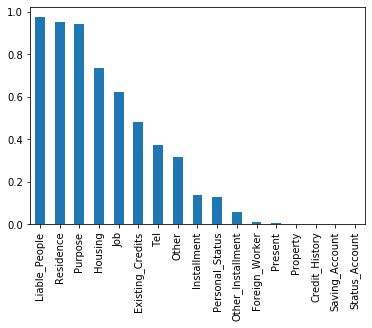

In [31]:
p_values = pd.Series(chi_score[1],index = join.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()

#### On pourra supprimer les variables qui ont une p_value > 0.05 

In [32]:
data2 = data.drop(columns=["Liable_People","Residence","Purpose","Job","Existing_Credits","Tel","Other","Installment","Personal_Status"])

In [33]:
Pipe2 = Pp(data2,target)

In [34]:
Pipe2.data_split([1,3,7],[1,3,7])

In [35]:
Pipe2.num.head()

,Duration,Credit_Amount,Age
0,6,1169,67
1,48,5951,22
2,12,2096,49
3,42,7882,45
4,24,4870,53


In [36]:
Pipe2.quali.head()

,Status_Account,Credit_History,Saving_Account,Present,Property,Other_Installment,Housing,Foreign_Worker
0,A11,A34,A65,A75,A121,A143,A152,A201
1,A12,A32,A61,A73,A121,A143,A152,A201
2,A14,A34,A61,A74,A121,A143,A152,A201
3,A11,A32,A61,A74,A122,A143,A153,A201
4,A11,A33,A61,A73,A124,A143,A153,A201


In [38]:
ger_cat = Pipe2.quali
dictEnc = {}
var_categs = []

In [41]:
for col in ger_cat.columns:
    le = LabelEncoder()
    varLE = le.fit_transform(ger_cat[col])
    dictEnc[col] = le
    var_categs.append(pd.DataFrame(varLE))
data_cat_LE = pd.concat(var_categs, axis=1)
ohe = OneHotEncoder()
data_cat_OH = ohe.fit_transform(data_cat_LE)
dictEnc['onehot'] = ohe

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [46]:
dictEnc

{'Status_Account': LabelEncoder(),
 'Credit_History': LabelEncoder(),
 'Saving_Account': LabelEncoder(),
 'Present': LabelEncoder(),
 'Property': LabelEncoder(),
 'Other_Installment': LabelEncoder(),
 'Housing': LabelEncoder(),
 'Foreign_Worker': LabelEncoder(),
 'onehot': OneHotEncoder(categorical_features=None, categories=None, drop=None,
               dtype=<class 'numpy.float64'>, handle_unknown='error',
               n_values=None, sparse=True)}

In [45]:
dictEnc['onehot'].categories_

[array([0., 1., 2., 3.]),
 array([0., 1., 2., 3., 4.]),
 array([0., 1., 2., 3., 4.]),
 array([0., 1., 2., 3., 4.]),
 array([0., 1., 2., 3.]),
 array([0., 1., 2.]),
 array([0., 1., 2.]),
 array([0., 1.]),
 array([0., 1., 2., 3.]),
 array([0., 1., 2., 3., 4.]),
 array([0., 1., 2., 3., 4.]),
 array([0., 1., 2., 3., 4.]),
 array([0., 1., 2., 3.]),
 array([0., 1., 2.]),
 array([0., 1., 2.]),
 array([0., 1.])]

In [49]:
j = pd.DataFrame(data_cat_OH.toarray())
j.head()

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [50]:
data7 = Pipe2.data_join(Pipe.scaler(Pipe2.num,1),j)

In [51]:
data7.head()

,Duration,Credit_Amount,Age,0,1,2,3,4,5,6,...,52,53,54,55,56,57,58,59,60,61
0,-1.236478,-0.745131,2.766456,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.248194,0.949817,-1.191404,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,-0.738668,-0.416562,1.183312,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,1.750384,1.634247,0.831502,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.256953,0.566664,1.535122,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [52]:
X_train, X_test, y_train, y_test = train_test_split(data7, target-1, test_size = 0.25, random_state = 0)

### RFC

In [53]:
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

y_pred_prob = classifier.predict_proba(X_test)[:,1]
y_pred = classifier.predict(X_test)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


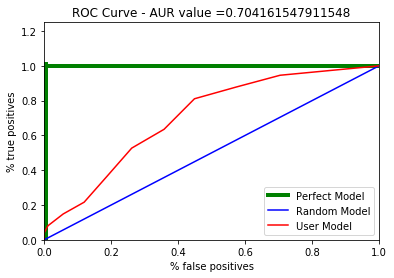

In [54]:
roccurve(y_values=y_test, y_preds_proba=y_pred_prob)

In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78       176
           1       0.45      0.36      0.40        74

    accuracy                           0.68       250
   macro avg       0.60      0.59      0.59       250
weighted avg       0.66      0.68      0.67       250



In [56]:
import lightgbm as lgb

model = lgb.LGBMClassifier().fit(X_train, y_train)

y_pred_lightgbm_prob = model.predict_proba(X_test)[:,1]
y_pred_lightgbm=model.predict(X_test)

roccurve (y_test,y_pred_lightgbm_prob)

ModuleNotFoundError: No module named 'lightgbm'

In [63]:
print(classification_report(y_test,y_pred_lightgbm))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       176
           1       0.58      0.50      0.54        74

    accuracy                           0.74       250
   macro avg       0.69      0.67      0.68       250
weighted avg       0.74      0.74      0.74       250



## Logistic Regression

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


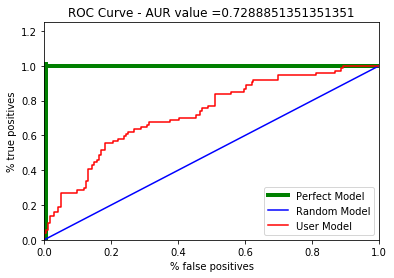

In [57]:
model = LogisticRegression().fit(X_train, y_train)

y_pred_logistic_regression_prob = model.predict_proba(X_test)[:,1]
y_pred_logistic_regression = model.predict(X_test)

roccurve(y_test,y_pred_logistic_regression_prob)

In [58]:
print(classification_report(y_test,y_pred_logistic_regression))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       176
           1       0.56      0.45      0.50        74

    accuracy                           0.73       250
   macro avg       0.67      0.65      0.66       250
weighted avg       0.72      0.73      0.72       250



In [59]:
model = XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 1,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=5, 
                      gamma=1)
model.fit(X_train, y_train)
y_pred_xgboost= model.predict(X_test)

NameError: name 'XGBClassifier' is not defined

In [52]:
print(classification_report(y_test,y_pred_xgboost))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       176
           1       0.61      0.50      0.55        74

    accuracy                           0.76       250
   macro avg       0.71      0.68      0.69       250
weighted avg       0.75      0.76      0.75       250



In [53]:
#Initializing an XGBClassifier with default parameters and fitting the training data
from xgboost import XGBClassifier
classifier1 = XGBClassifier().fit(X_train, y_train)

In [54]:
#Predicting for training set
y_pred_xgboost = classifier1.predict(X_test)
print(classification_report(y_test, y_pred_xgboost))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       176
           1       0.58      0.42      0.49        74

    accuracy                           0.74       250
   macro avg       0.68      0.65      0.66       250
weighted avg       0.72      0.74      0.73       250



In [64]:
#Importing necessary libraries
from bayes_opt import BayesianOptimization
from sklearn.metrics import mean_squared_error
import xgboost as xgb

#Converting the dataframe into XGBoost’s Dmatrix object
dtrain = xgb.DMatrix(X_train, y_train)

#Bayesian Optimization function for xgboost
#specify the parameters you want to tune as keyword arguments
def bo_tune_xgb(max_depth, gamma, n_estimators ,learning_rate):
    params = {'max_depth': int(max_depth),
              'gamma': gamma,
              'n_estimators': int(n_estimators),
              'learning_rate':learning_rate,
              'subsample': 0.8,
              'eta': 0.1,
              'eval_metric': 'rmse'}
    cv_result = xgb.cv(params, dtrain, num_boost_round=70, nfold=5)
    return -1.0 * cv_result['test-rmse-mean'].iloc[-1]

#Invoking the Bayesian Optimizer with the specified parameters to tune
xgb_bo = BayesianOptimization(bo_tune_xgb, {'max_depth': (3, 10),
                                             'gamma': (0, 1),
                                             'learning_rate':(0,1),
                                             'n_estimators':(150,500)
                                            })

#performing Bayesian optimization for 5 iterations with 8 steps of random exploration with an #acquisition function of expected improvement
xgb_bo.maximize(n_iter=5, init_points=8, acq='ei')

C:\Users\Brahim\Anaconda3\envs\ML\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


|   iter    |  target   |   gamma   | learni... | max_depth | n_esti... |
-------------------------------------------------------------------------
|  1        | -0.4128   |  0.9764   |  0.2043   |  6.055    |  172.4    |
|  2        | -0.4319   |  0.379    |  0.2696   |  5.442    |  271.0    |
|  3        | -0.4189   |  0.5992   |  0.1528   |  7.218    |  330.8    |
|  4        | -0.4725   |  0.09227  |  0.4702   |  9.847    |  354.6    |
|  5        | -0.4217   |  0.3634   |  0.1503   |  7.172    |  371.3    |
|  6        | -0.5211   |  0.3994   |  0.9634   |  4.548    |  468.2    |
|  7        | -0.4142   |  0.2898   |  0.05241  |  3.917    |  303.0    |
|  8        | -0.4285   |  0.3279   |  0.1778   |  8.982    |  230.6    |
|  9        | -0.5      |  1.0      |  0.0      |  3.0      |  405.5    |
|  10       | -0.5      |  1.0      |  0.0      |  3.0      |  500.0    |
|  11       | -0.5      |  1.0      |  0.0      |  3.0      |  150.0    |
|  12       | -0.5      |  1.0      | 

In [65]:
#Extracting the best parameters
params = xgb_bo.max['params']
print(params)

#Converting the max_depth and n_estimator values from float to int
params['max_depth']= int(params['max_depth'])
params['n_estimators']= int(params['n_estimators'])

#Initialize an XGBClassifier with the tuned parameters and fit the training data
from xgboost import XGBClassifier
classifier2 = XGBClassifier(**params).fit(X_train, y_train)

#predicting for training set
train_p2 = classifier2.predict(X_test)

#Looking at the classification report
print(classification_report(train_p2, y_test))

{'gamma': 0.9763702236617886, 'learning_rate': 0.20431627495697013, 'max_depth': 6.055331144960701, 'n_estimators': 172.3562805242832}
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       197
           1       0.43      0.60      0.50        53

    accuracy                           0.75       250
   macro avg       0.66      0.70      0.67       250
weighted avg       0.79      0.75      0.76       250



# Conclusion

In [75]:
data = {'Model':['RFC', 'LGBM', 'LogisticReg', 'XGB'], 'Raw Precision Score':[76, 81, 74, 80],'Selected Features Score':[77,80,81,80]} 
  
# Create DataFrame 
df = pd.DataFrame(data) 
  
# Print the output. 
df 

,Model,Raw Precision Score,Selected Features Score
0,RFC,76,77
1,LGBM,81,80
2,LogisticReg,74,81
3,XGB,80,80


The BayesianOptimized Model after Feature selection gave us the best score with a precision of __88%__ and an accuracy of __76%__